# **Visualización**
# AE06. Seaborn Gráfico de Barras

Veamos más tipos de gráficos en Seaborn:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [4]:
# Importamos las librerias adicionales para el manejo numerico y de DataFrame
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna()
#penguins_df = pd.read_csv("/content/drive/MyDrive/Colab Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>Gráficos de barras</font>

Para generar gráficos de barras tenemos múltiples opciones utilizando seaborn, pero siempre con la misma lógica de llamar simplemente a un método y obtener el gráfico asociado. En este caso el primer método corresponde a `sns.barplot(x=X, y=Y, data=df, ci='sd)`, el cual nos generara un gráfico de barras asociados a las variables que nosotros asignemos. Una cosa a notar es el parámetro `ci` el cual hace mención a intervalo de confianza, y que nosotros le hemos dado el valor de `'sd'`. Este método realizara una agregación de forma automática al momento de graficar:

[Documentación Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)


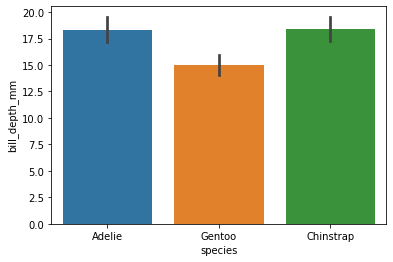

In [7]:
sns.barplot(x='species', y ='bill_depth_mm', ci='sd', #usar en el formato de seaborn (data=df)
            data=penguins_df)  #ci un el intervalo de confianza (para boostrap), en este caso muestra la desviación estándar
plt.show()

**¿Qué será lo que está graficando?**

In [8]:
penguins_df.groupby("species")['bill_depth_mm'].agg(['mean','std']) #calcula la media y sd por especie

,mean,std
species,,
Adelie,18.347260,1.219338
Chinstrap,18.420588,1.135395
Gentoo,14.996639,0.985998


La respuesta es el promedio y la desviación estándar para dichas columnas. Nosotros podríamos cambiar el método de agregación utilizando el parámetro `agg` y asignándole como valor una función. Ejemplo de una modificación donde muestre el conteo de elementos no nulos y sin barras de "error":

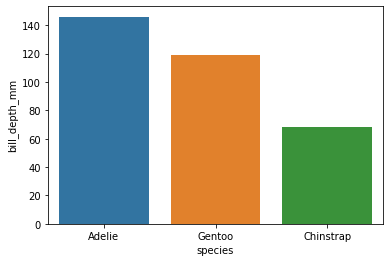

In [9]:
# Dejamos el parametro ci=None para que evite calcular un intervalo de confianza
# y modificamos la función de agregación presente en el parametro `estimator`
sns.barplot(x='species', y ='bill_depth_mm', ci=None, estimator=pd.Series.count, #estimator es la función de agregación
            data=penguins_df)
plt.show()

Alternativamente, existe un método genérico asociado a las variables categorías llamado: `sns.catplot`. Este método puede generar gráficos asociados a las variables categóricas de distinto tipo, utilizando el parámetro `kind` y para generar el primer gráfico de barra visto, simplemente declaramos `kind="bar"`:

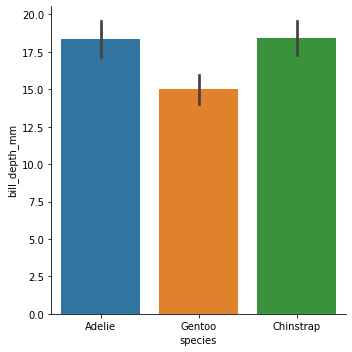

In [10]:
sns.catplot(x="species", y="bill_depth_mm", kind="bar", data=penguins_df, ci='sd') #kind tipo bars para catplot (cat = category)
plt.show()

Además de `sns.barplot` y `sns.catplot`, tenemos el método `sns.countplot` el cual cuenta los elementos no nulos en las columna a graficar.

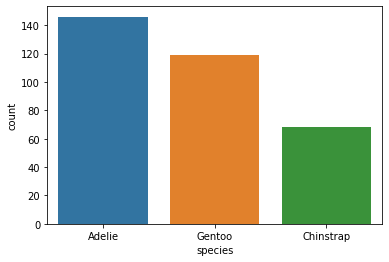

In [11]:
sns.countplot(x='species',data=penguins_df) #solo una variable, y es de conteo
plt.show()

Y a su vez, existe el `kind=count` en el método `sns.catplot`

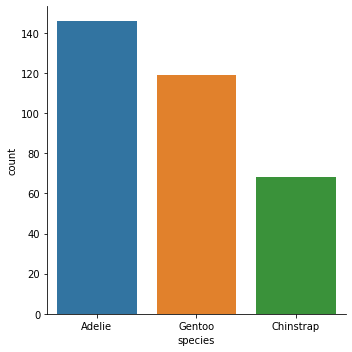

In [12]:
sns.catplot(x="species", kind="count", data=penguins_df) #Kind tipo count

# <font color='orangered'>Modificando estilos</font>

## <font color='orangered'>Barplot</font>

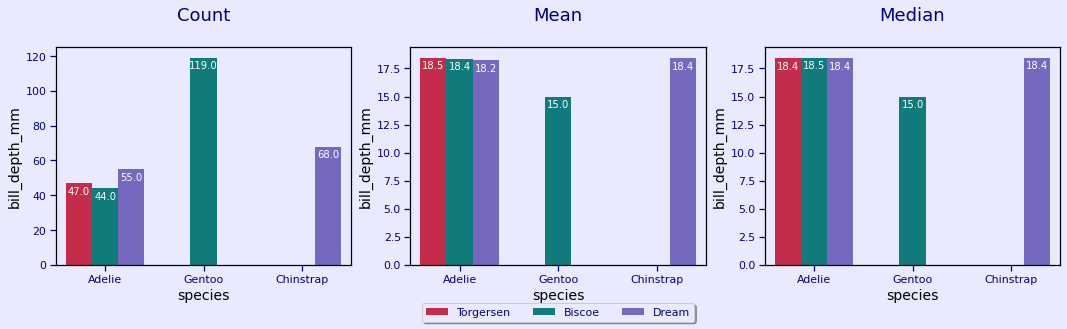

In [18]:
func = [pd.Series.count, pd.Series.mean, pd.Series.median]
title_func = ['Count', 'Mean', 'Median']

sns.set_theme(style={'axes.facecolor': '#eaeaff', # color dentro del grafico
                     'figure.facecolor': '#eaeaff', #color de fondo
                     'text.color': 'navy',
                     'xtick.color': 'navy',
                     'ytick.color': 'navy',
                     })
sns.set_palette(['crimson', 'darkcyan', 'slateblue']) # define paleta de colores

plt.subplots(1, len(title_func), figsize=(6*len(title_func), 4))
for i, title in enumerate(title_func):
    plt.subplot(1, len(title_func), i + 1)
    bp = sns.barplot(x='species', y ='bill_depth_mm', data=penguins_df, ci=None, estimator=func[i], hue='island')
    # Anotaciones en color blanco
    for p in bp.patches:
        bp.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, -8), textcoords = 'offset points', color='w', fontsize=10)
    # Titulos graficos y ejes
    bp.set_xlabel('species', fontsize=14)
    bp.set_ylabel('bill_depth_mm', fontsize=14)
    bp.set_title(title + '\n', fontsize=18)
    # Deja una única leyenda central
    if i == 1:
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
    else:
        bp.get_legend().remove()

plt.show()

## <font color='orangered'>Catplot (swarm):</font>

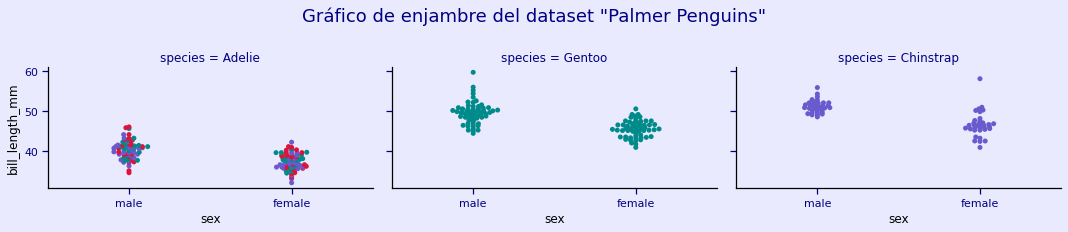

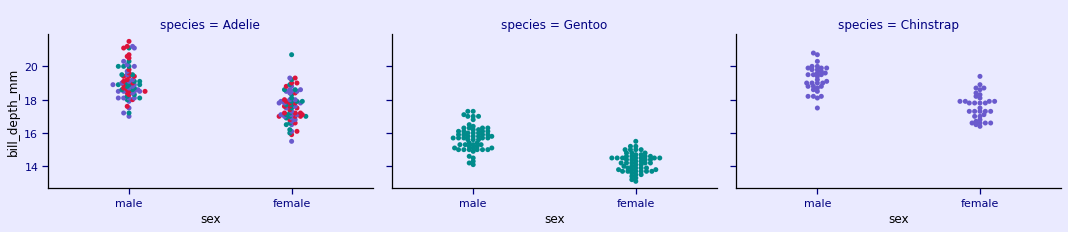

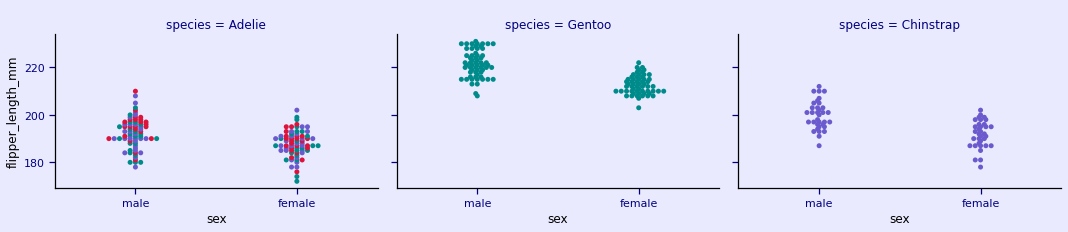

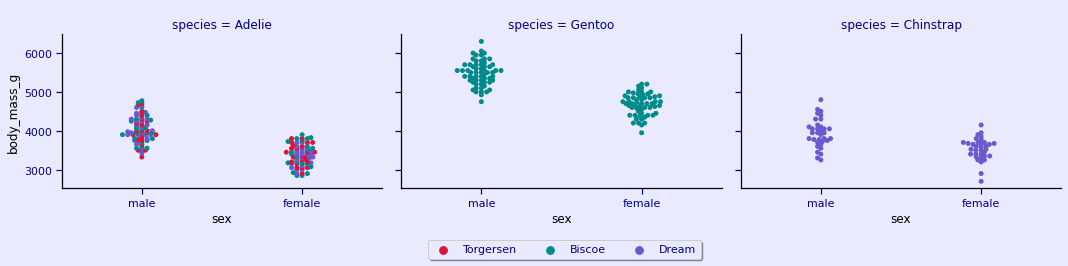

In [25]:
title_col = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i, title in enumerate(title_col):
    cp = sns.catplot(x="sex", y=title, kind="swarm", hue='island', col='species', data=penguins_df, legend=False) #kind swarm
    if i==0:
        plt.subplots_adjust(top=0.7)
        cp.fig.suptitle('Gráfico de enjambre del dataset "Palmer Penguins"', fontsize=18) 
    else:
        plt.subplots_adjust(top=0.85)
        cp.fig.suptitle(' ') 
    cp.fig.set_size_inches(15,3)
    
plt.legend(loc='upper center', bbox_to_anchor=(-0.55, -0.3), fancybox=True, shadow=True, ncol=5)
plt.show()

## <font color='orangered'>Catplot (violin):</font>

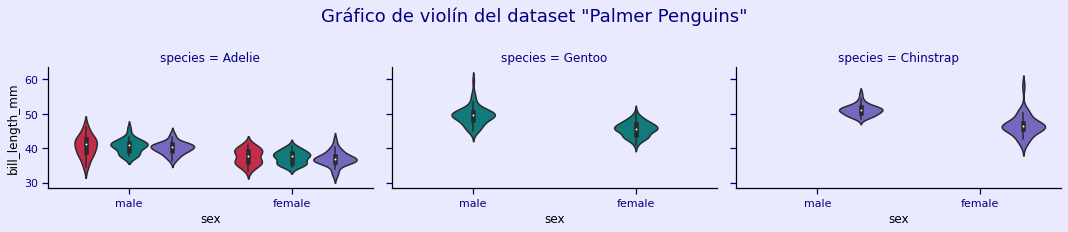

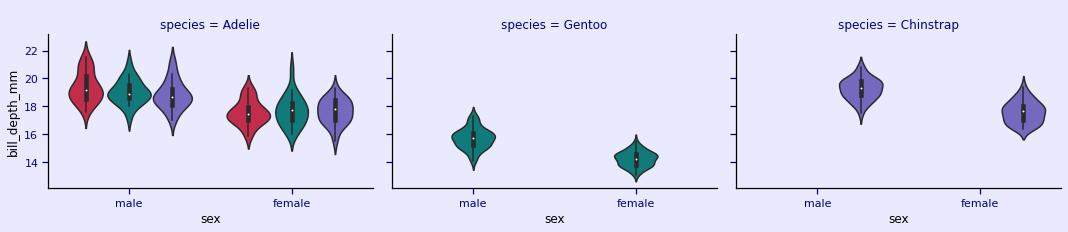

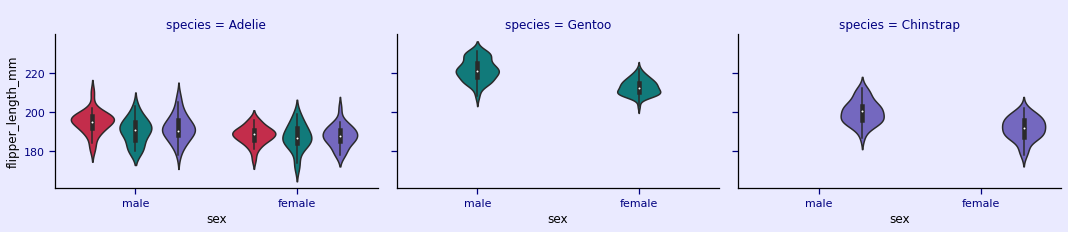

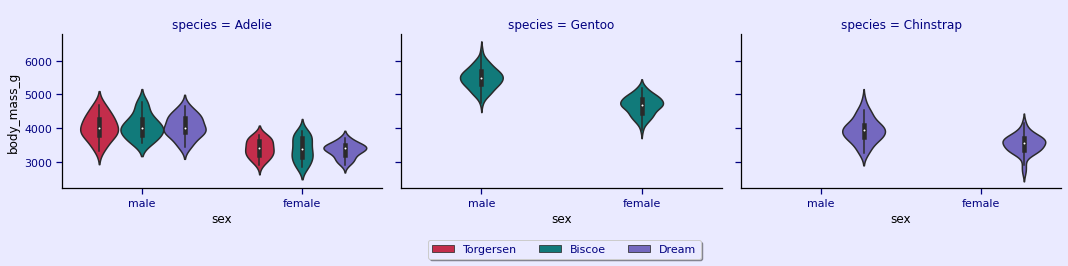

In [27]:
title_col = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i, title in enumerate(title_col):
    cp = sns.catplot(x="sex", y=title, kind="violin", hue='island', col='species', data=penguins_df, legend=False) #kind violin 
    if i==0:
        plt.subplots_adjust(top=0.7)
        cp.fig.suptitle('Gráfico de violín del dataset "Palmer Penguins"', fontsize=18) 
    else:
        plt.subplots_adjust(top=0.85)
        cp.fig.suptitle(' ') 
    cp.fig.set_size_inches(15,3)
    
plt.legend(loc='upper center', bbox_to_anchor=(-0.55, -0.3), fancybox=True, shadow=True, ncol=5) #legend
plt.show()